Antes de ejecutar el programa instala la libreria ternary para plotear los datos de las muestras clasificadas.



In [64]:
!pip install python-ternary

Inicialice la lista donde guardara las muestras clasificadas, si desea borrarlas simplemente dele run nuevamente y quedaran vacias

In [56]:
Lista_muestras_clasificadas = []

In [ ]:
print("Programa para clasificar rocas sedimentarias por composicion")

def main():
  x, suma_por = 0, 0
  while((suma_por) !=  100):
    print("Introduzca la cantidad de componentes en porcentajes presentes en la roca, debe sumar 100 %")
    suma_por = revisar_porcentaje_total (x)

def crear_elemento(nombre,Terr,All,Ort):
  elemento = []
  elemento = [nombre,Terr,All,Ort]
  Lista_muestras_clasificadas.append(elemento)
  return elemento

def revisar_datos(x):
  dato = 0
  if x.isalpha() == True:
    while x.isalpha() == True:
      print ("Valor no valido, inserte un numero") 
      x = input("Porcentaje de componente en la roca:").strip() 
      if x.isalpha() ==  False:
        dato = float(x)
        return dato
        break          
  elif type(float(x)) == float:
      dato = float(x)
      return dato
  elif x.isnumeric() == True:
      dato = float(x)
      return dato

def revisar_porcentaje_total (x):
  x = input("Porcentaje de componente Terrigenos en la roca: ").strip()
  Terr = revisar_datos(x)
  x = input("Porcentaje de componente Alloquimicos en la roca: ").strip()
  All = revisar_datos(x)
  x = input("Porcentaje de componente Ortoquimicos en la roca: ").strip()
  Ort = revisar_datos(x)
  suma_por = Terr + All + Ort
  if (suma_por) == 100:
    print("La suma de los tres tipos de componentes es {:.2f}% ".format(suma_por))
    nombre = Class_Comp (Terr,All,Ort)
    crear_elemento(nombre,Terr,All,Ort)
    return suma_por 

def Class_Comp (Terr,All,Ort):
  nombre = ''
  if (Terr >= 50) and (All + Ort <= 50):
    nombre = 'Terrigena'
    print("Es una roca Terrigena ya que tiene {:.2f}% de Terrigenos {:.2f}% de Alloquimicos y {:.2f}% de Ortoquimicos".format(Terr, All, Ort))
  elif (Terr <= 10) and (All >= 10):
    nombre = 'Alloquimica'
    print("Es una roca Alloquimica ya que tiene {:.2f}% de Terrigenos {:.2f}% de Alloquimicos y {:.2f}% de Ortoquimicos".format(Terr, All, Ort))
  elif (Terr <= 10) and (All < 10):
    nombre = 'Ortoquimica'
    print("Es una roca Ortoquimica ya que tiene {:.2f}% de Terrigenos {:.2f}% de Alloquimicos y {:.2f}% de Ortoquimicos".format(Terr, All, Ort))
  elif (10 < Terr < 50) and (All > 10):
    nombre = 'Alloquimica Impura'
    print("Es una roca Alloquimica Impura ya que tiene {:.2f}% de Terrigenos {:.2f}% de Alloquimicos y {:.2f}% de Ortoquimicos".format(Terr, All, Ort))
  elif (10 < Terr < 50) and (All <= 10):
    nombre = 'Ortoquimica Impura'
    print("Es una roca Ortoquimica Impura ya que tiene {:.2f}% de Terrigenos {:.2f}% de Alloquimicos y {:.2f}% de Ortoquimicos".format(Terr, All, Ort))
  return nombre


Para clasificar una muestra nueva ejecute la siguiente celda.








In [178]:
main()

Introduzca la cantidad de componentes en porcentajes presentes en la roca, debe sumar 100 %
Porcentaje de componente Terrigenos en la roca: 35
Porcentaje de componente Alloquimicos en la roca: 5
Porcentaje de componente Ortoquimicos en la roca: 60
La suma de los tres tipos de componentes es 100.00% 
Es una roca Ortoquimica Impura ya que tiene 35.00% de Terrigenos 5.00% de Alloquimicos y 60.00% de Ortoquimicos


Puede ir comprobando como se van almacenando las muestras que ya estan clasificadas ejecutando las dos celdas que siguen

In [179]:
print(Lista_muestras_clasificadas)

[['Terrigena', 50.0, 25.0, 25.0], ['Alloquimica', 10.0, 45.0, 45.0], ['Terrigena', 75.0, 5.0, 20.0], ['Terrigena', 90.0, 5.0, 5.0], ['Alloquimica Impura', 20.0, 20.0, 60.0], ['Ortoquimica', 5.0, 5.0, 90.0], ['Alloquimica Impura', 40.0, 60.0, 0.0], ['Ortoquimica Impura', 35.0, 5.0, 60.0]]


In [217]:
import pandas as pd
df = pd.DataFrame(Lista_muestras_clasificadas,columns=['Nombre','Terrigenos','Aloquimicos','Ortoquimicos'])
df.index += 1 
df

,Nombre,Terrigenos,Aloquimicos,Ortoquimicos
1,Terrigena,50.0,25.0,25.0
2,Alloquimica,10.0,45.0,45.0
3,Terrigena,75.0,5.0,20.0
4,Terrigena,90.0,5.0,5.0
5,Alloquimica Impura,20.0,20.0,60.0
6,Ortoquimica,5.0,5.0,90.0
7,Alloquimica Impura,40.0,60.0,0.0
8,Ortoquimica Impura,35.0,5.0,60.0


Ahora puede graficas las muestras en el diagrama ternario

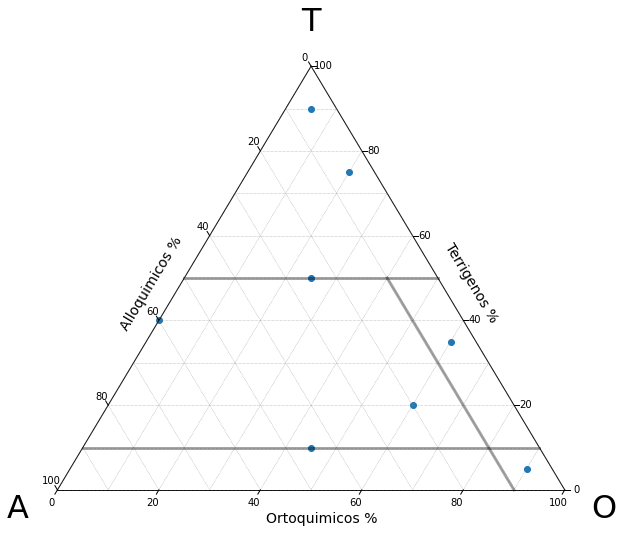

In [218]:
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 9)

# Plotea los puntos de las muestras ya clasificadas.
tax.scatter(df[['Ortoquimicos', 'Terrigenos', 'Aloquimicos']].values)

# etiquetas de los ejes. 
fontsize = 14
offset = 0.08
tax.left_axis_label("Alloquimicos %", fontsize=fontsize, offset=offset)
tax.right_axis_label("Terrigenos %", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Ortoquimicos %", fontsize=fontsize, offset=-offset)

# etiquetas de los bordes
fontsize = 32
offset = 0.1
tax.top_corner_label("T", fontsize=fontsize, offset=0.2)
tax.left_corner_label("A", fontsize=fontsize, offset=offset)
tax.right_corner_label("O", fontsize=fontsize, offset=offset)

# Retoques
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="gray")
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.get_axes().axis('off')

p1, p2 = (50, 50, 0), (0, 50, 50)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")
p1, p2 = (90, 0, 10), (40, 50, 0)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")
p1, p2 = (0, 10, 0), (90, 10, 0)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")

tax.show()

Tambien puede visualisar las muestras por colores agrupando las estan en el mismo cuadrante.

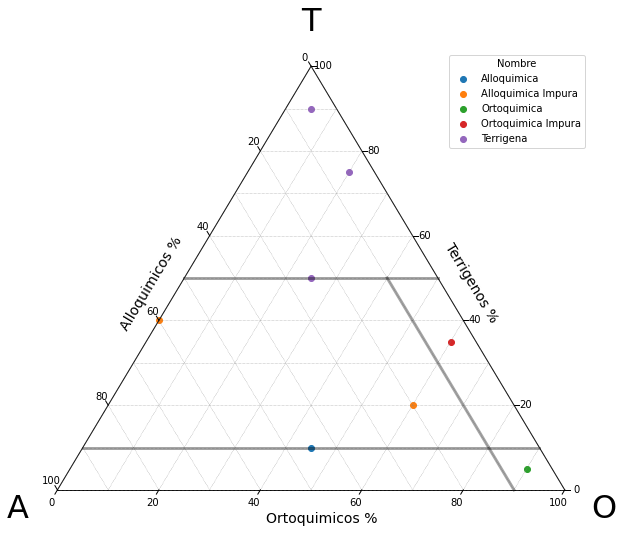

In [223]:
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 9)

# Plotea los puntos de las muestras ya clasificadas agrupandolos por nombres.
for name, group in df.groupby('Nombre'):
    points = group[['Ortoquimicos', 'Terrigenos', 'Aloquimicos']].values
    tax.scatter(points, marker='o', label=name)

# etiquetas de los ejes.
fontsize = 14
offset = 0.08
tax.left_axis_label("Alloquimicos %", fontsize=fontsize, offset=offset)
tax.right_axis_label("Terrigenos %", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Ortoquimicos %", fontsize=fontsize, offset=-offset)

# etiquetas de los bordes
fontsize = 32
offset = 0.1
tax.top_corner_label("T", fontsize=fontsize, offset=0.2)
tax.left_corner_label("A", fontsize=fontsize, offset=offset)
tax.right_corner_label("O", fontsize=fontsize, offset=offset)

# Retoques
tax.legend(title="Nombre")
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="gray")
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.get_axes().axis('off')

p1, p2 = (50, 50, 0), (0, 50, 50)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")
p1, p2 = (90, 0, 10), (40, 50, 0)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")
p1, p2 = (0, 10, 0), (90, 10, 0)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.35, linestyle="-")

tax.show()

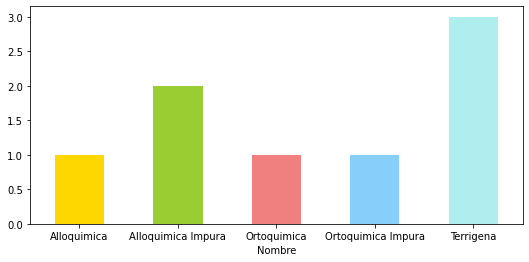

In [220]:
data_histogram = df.groupby('Nombre').size()
plt.figure(figsize=(30, 4))
plt.subplot(131)
ax = data_histogram.plot.bar(stacked=True, rot=0,color=['gold', 'yellowgreen', 'lightcoral','lightskyblue', 'paleturquoise'])

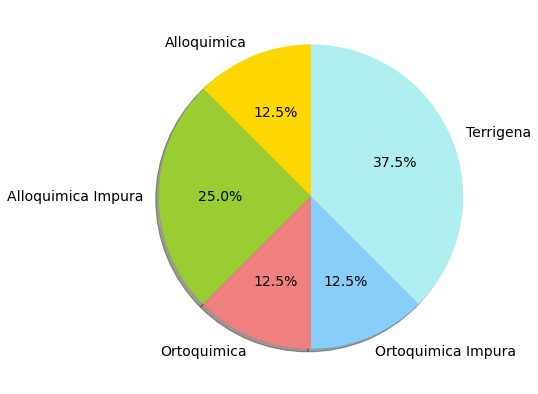

In [225]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'paleturquoise']
plot = data_histogram.plot.pie(figsize=(7, 7),autopct='%1.1f%%', shadow=True, startangle=90, colors=colors,label="",textprops={'fontsize': 14})